In [20]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

# __1 - Business Problem__  
___Classify the Size_Categorie using SVM___  

# __2 - Data collection and description__ 

In [7]:
df = pd.read_csv("forestfires.csv")
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [8]:
df.shape

(517, 31)

In [9]:
df[df.columns[0:11]].describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84


In [10]:
df[df.columns[0:11]].isnull().sum()

month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

# Finding Correlation

In [11]:
corr = df[df.columns[0:11]].corr()

<AxesSubplot:>

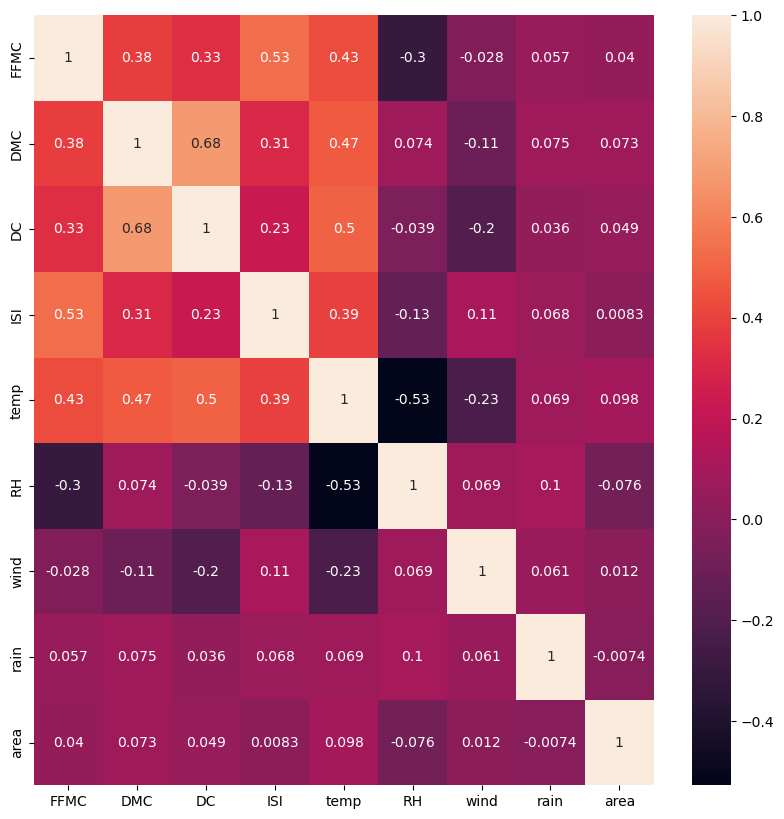

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

# Outlier Check

C:\Users\Yash Shinde\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


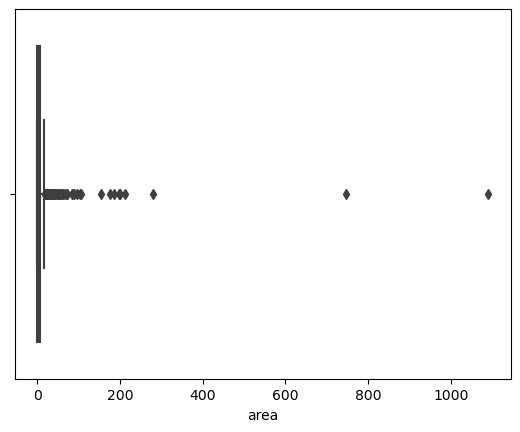

In [17]:
ax = sns.boxplot(df['area'])

There are 3 Outlier instances in our data

In [22]:
plt.rcParams["figure.figsize"] = 9,5

Skew: 12.846933533934868
Kurtosis: 194.1407210942299


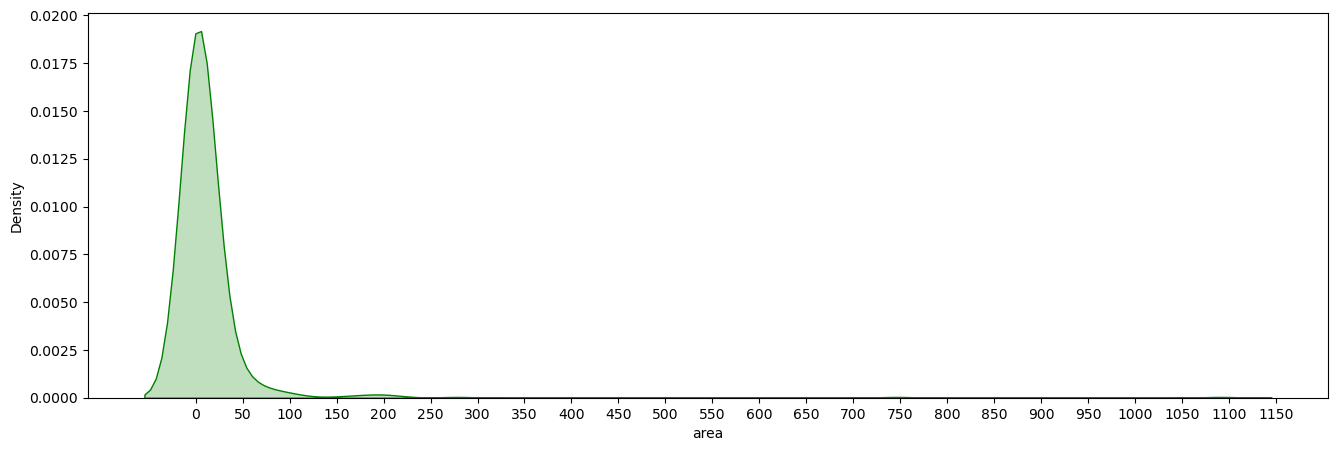

In [25]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df['area'].skew()))
print("Kurtosis: {}".format(df['area'].kurtosis()))
ax = sns.kdeplot(df['area'],shade=True,color='g')
plt.xticks([i for i in range(0,1200,50)])
plt.show()

The Data is highly skewed and has large kurtosis value 

Majority of the forest fires do not cover a large area, most of the damaged area is under 100 hectares of land

# __3 - SVM__ 

In [26]:
X = df.iloc[:,2:30]
Y = df.iloc[:,30]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)

In [28]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((361, 28), (361,), (156, 28), (156,))

# Grid Search CV

In [31]:
clf = SVC()
param_grid = [{'kernel':['rbf','poly','linear','sigmoid'],'gamma':[0.5,0.1],'C':[10,0.1], 'degree':[3,4,5,10] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [10, 0.1], 'degree': [3, 4, 5, 10],
                          'gamma': [0.5, 0.1],
                          'kernel': ['rbf', 'poly', 'linear', 'sigmoid']}])

In [32]:
clf = SVC()
param_grid = [{'kernel':['rbf','poly','linear','sigmoid'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001], 'degree':[3,4,5,10] }]
gsv = GridSearchCV(clf,param_grid,cv=2)
gsv.fit(X_train,y_train)

GridSearchCV(cv=2, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'degree': [3, 4, 5, 10], 'gamma': [50, 5, 10, 0.5],
                          'kernel': ['rbf', 'poly', 'linear', 'sigmoid']}])

In [33]:
gsv.best_params_ , gsv.best_score_ 

({'C': 15, 'degree': 3, 'gamma': 50, 'kernel': 'linear'}, 0.9806322897483118)

# __4 - Conclusion__ 

Linear Model gives the best accuracy  

